In [1]:
import pandas as pd
import numpy as np
from math import sin, cos, sqrt, atan2, radians
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt

In [2]:
df_user_with_residence = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/dados_18.11/df_main.csv')
df_user_with_residence = df_user_with_residence.drop('Unnamed: 0', 1)
df_user_with_residence.head()

,USER,ANTENNA_ID,PRESUMED_RESIDENCE
0,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5
1,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5
2,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5
3,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5
4,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5


In [3]:
antennas_with_id = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/dados_18.11/antenas_with_id.csv', index_col=0)
antennas_with_id['CITY'] = antennas_with_id['CITY'].str.upper()
antennas_with_id['CITY'] = antennas_with_id['CITY'].str.replace('-', ' ')
antennas_with_id['CITY'].unique()

array(['MADRE DE DEUS DE MINAS', 'SÃO JOÃO DEL REI', 'TIRADENTES',
       'LAGOA DOURADA', 'RITÁPOLIS', 'SÃO VICENTE DE MINAS', 'SÃO TIAGO'],
      dtype=object)

In [4]:
antennas_with_id

,ID,ANTENNA,CITY,LAT,LONG,ANTENNA_ID
0,4593,27712,MADRE DE DEUS DE MINAS,-21.48194,-44.33039,MDM
1,4706,23442,SÃO JOÃO DEL REI,-21.10707,-44.21979,SJDR1
2,4707,23463,SÃO JOÃO DEL REI,-21.12699,-44.26144,SJDR2
3,4863,23462,SÃO JOÃO DEL REI,-21.12699,-44.26144,SJDR2
4,5001,29943,TIRADENTES,-21.11886,-44.16478,TR1
5,5111,29011,TIRADENTES,-21.11760,-44.18130,TR2
6,5174,27713,MADRE DE DEUS DE MINAS,-21.48194,-44.33039,MDM
7,5181,29942,TIRADENTES,-21.11886,-44.16478,TR1
8,5483,23471,SÃO JOÃO DEL REI,-21.08391,-44.23300,SJDR3
9,5585,29941,TIRADENTES,-21.11886,-44.16478,TR1


In [4]:
cities_economic_data = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/ibge/sjdr_data_grouped_of_class.csv', index_col=0)
cities_economic_data = cities_economic_data.reset_index()
cities_economic_data = cities_economic_data.rename(columns={'Nome_do_municipio': 'CITY'})
antennas_with_id = antennas_with_id.merge(cities_economic_data, on='CITY')

In [5]:
antennas_with_id.groupby(['ANTENNA_ID']).min().reset_index()

,ANTENNA_ID,ID,ANTENNA,CITY,LAT,LONG,V005,classe
0,LD1,14448,49592,LAGOA DOURADA,-20.92802,-44.08333,917.415789,2
1,MDM,4593,27451,MADRE DE DEUS DE MINAS,-21.48194,-44.33039,809.078333,2
2,RT,16547,51601,RITÁPOLIS,-21.02604,-44.32029,716.333846,2
3,SJDR1,4706,23441,SÃO JOÃO DEL REI,-21.10707,-44.21979,1259.484583,3
4,SJDR2,4707,23461,SÃO JOÃO DEL REI,-21.12699,-44.26144,1259.484583,3
5,SJDR3,5483,23471,SÃO JOÃO DEL REI,-21.08391,-44.23300,1259.484583,3
6,SJDR4,6666,23451,SÃO JOÃO DEL REI,-21.13140,-44.24749,1259.484583,3
7,SJDR5,14626,50141,SÃO JOÃO DEL REI,-21.13589,-44.25834,1259.484583,3
8,ST,30226,51371,SÃO TIAGO,-20.91224,-44.50842,809.130000,2
9,SVM,17493,60761,SÃO VICENTE DE MINAS,-21.70206,-44.44245,998.187273,2


In [6]:
antennas_and_lat_long = antennas_with_id.groupby('ANTENNA_ID').agg({'LAT': min, 'LONG':min, 'classe':min}).reset_index()
antennas_and_lat_long

,ANTENNA_ID,LAT,LONG,classe
0,LD1,-20.92802,-44.08333,2
1,MDM,-21.48194,-44.33039,2
2,RT,-21.02604,-44.32029,2
3,SJDR1,-21.10707,-44.21979,3
4,SJDR2,-21.12699,-44.26144,3
5,SJDR3,-21.08391,-44.23300,3
6,SJDR4,-21.13140,-44.24749,3
7,SJDR5,-21.13589,-44.25834,3
8,ST,-20.91224,-44.50842,2
9,SVM,-21.70206,-44.44245,2


In [7]:
df_residence_by_class = antennas_and_lat_long[['ANTENNA_ID', 'classe']]
df_residence_by_class.rename(columns={'ANTENNA_ID':'PRESUMED_RESIDENCE', 'classe': 'CLASS'}, inplace=True)
df_residence_by_class.to_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/Regiao_Presumida/df_residence_by_class.csv', index=False)

/home/gustavo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Calculando a distância entre as antenas

In [8]:
def dist(x, y):
    
    lat1 = radians(x[0])
    lon1 = radians(x[1])
    lat2 = radians(y[0])
    lon2 = radians(y[1])
    
    R = 6373.0
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat/2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    
    return round(distance, 4)

In [9]:
distances = pdist(antennas_and_lat_long[['LAT', 'LONG']].values, metric=dist)

points = antennas_and_lat_long['ANTENNA_ID'].values

result = pd.DataFrame(squareform(distances), columns=points, index=points)

result

,LD1,MDM,RT,SJDR1,SJDR2,SJDR3,SJDR4,SJDR5,ST,SVM,TR1,TR2
LD1,0.0000,66.7267,26.9171,24.4415,28.8400,23.2851,28.3236,29.4062,44.2006,93.7940,22.8496,23.4121
MDM,66.7267,0.0000,50.7205,43.2435,40.1224,45.4089,39.9257,39.2085,66.0024,27.0885,43.8808,43.3709
RT,26.9171,50.7205,0.0000,13.7858,12.7824,11.1147,13.9437,13.8070,23.2815,76.2509,19.1602,17.6587
SJDR1,24.4415,43.2435,13.7858,0.0000,4.8565,2.9181,3.9477,5.1259,36.9841,70.0825,5.8567,4.1621
SJDR2,28.8400,40.1224,12.7824,4.8565,0.0000,5.6277,1.5282,1.0409,35.0451,66.6546,10.0698,8.3804
SJDR3,23.2851,45.4089,11.1147,2.9181,5.6277,0.0000,5.4921,6.3515,34.3890,72.0973,8.0764,6.5441
SJDR4,28.3236,39.9257,13.9437,3.9477,1.5282,5.4921,0.0000,1.2315,36.4444,66.6074,8.6942,7.0370
SJDR5,29.4062,39.2085,13.8070,5.1259,1.0409,6.3515,1.2315,0.0000,35.9583,65.7973,9.8902,8.2480
ST,44.2006,66.0024,23.2815,36.9841,35.0451,34.3890,36.4444,35.9583,0.0000,88.1171,42.4416,40.9318
SVM,93.7940,27.0885,76.2509,70.0825,66.6546,72.0973,66.6074,65.7973,88.1171,0.0000,70.9562,70.4098


In [10]:
melt_df = pd.melt(result.reset_index(), id_vars='index')
melt_df.rename(columns={'index': 'ANTENNA_ID', 'variable': 'PRESUMED_RESIDENCE', 'value': 'DISTANCE'}, inplace=True)

melt_df

,ANTENNA_ID,PRESUMED_RESIDENCE,DISTANCE
0,LD1,LD1,0.0000
1,MDM,LD1,66.7267
2,RT,LD1,26.9171
3,SJDR1,LD1,24.4415
4,SJDR2,LD1,28.8400
...,...,...,...
139,SJDR5,TR2,8.2480
140,ST,TR2,40.9318
141,SVM,TR2,70.4098
142,TR1,TR2,1.7198


In [11]:
df_main = pd.merge(df_user_with_residence, melt_df, left_on=['ANTENNA_ID', 'PRESUMED_RESIDENCE'], right_on=['ANTENNA_ID', 'PRESUMED_RESIDENCE'])
df_main.to_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/travelled_distance/df_main.csv')

In [12]:
df_classe = pd.merge(df_main, antennas_and_lat_long, on='ANTENNA_ID')
df_classe = df_classe[['USER', 'PRESUMED_RESIDENCE', 'classe']]
df_classe.rename(columns={'classe': 'CLASS'}, inplace=True)
df_classe.to_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/Regiao_Presumida/df_classe.csv', index=False)

In [13]:
df_final = df_main.groupby(['USER', 'PRESUMED_RESIDENCE']).agg({'ANTENNA_ID': list, 'DISTANCE': sum}).reset_index()
df_final.rename(columns={'ANTENNA_ID':'CALL_LOC', 'DISTANCE': 'TRAVELLED_DISTANCE'}, inplace=True)
df_final['CALL_LOC'] = df_final['CALL_LOC'].apply(lambda x: frozenset(x))
df_final.to_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/travelled_distance/df_final.csv')

# Medidas de Posição e Dispersão

In [14]:
df_without_0 = df_final.loc[df_final['TRAVELLED_DISTANCE']>0]
df_with_0 = df_final

df_median_without_0 = df_without_0.groupby(['PRESUMED_RESIDENCE']).median()
df_median_without_0 = df_median_without_0.rename(columns={'TRAVELLED_DISTANCE': 'HIGHER_MEDIAN'})

df_median_with_0 = df_with_0.groupby(['PRESUMED_RESIDENCE']).median()
df_median_with_0 = df_median_with_0.rename(columns={'TRAVELLED_DISTANCE': 'LOWER_MEDIAN'})

df_mean_without_0 = df_without_0.groupby(['PRESUMED_RESIDENCE']).mean()
df_mean_without_0 = df_mean_without_0.rename(columns={'TRAVELLED_DISTANCE': 'HIGHER_MEAN'})

df_mean_with_0 = df_with_0.groupby(['PRESUMED_RESIDENCE']).mean()
df_mean_with_0 = df_mean_with_0.rename(columns={'TRAVELLED_DISTANCE': 'LOWER_MEAN'})

df_std_without_0 = df_without_0.groupby(['PRESUMED_RESIDENCE']).std()
df_std_without_0 = df_std_without_0.rename(columns={'TRAVELLED_DISTANCE': 'HIGHER_STD'})

df_std_with_0 = df_with_0.groupby(['PRESUMED_RESIDENCE']).std()
df_std_with_0 = df_std_with_0.rename(columns={'TRAVELLED_DISTANCE': 'LOWER_STD'})

In [15]:
print(len(df_with_0), '-', len(df_without_0))

59785 - 10044


In [16]:
df_with_0

,USER,PRESUMED_RESIDENCE,CALL_LOC,TRAVELLED_DISTANCE
0,00003F26576D1122848B6F3CEEC250E5,SJDR5,(SJDR5),0.0
1,000579E8BA1DA9E5292392473BCCCD2A,LD1,(LD1),0.0
2,0008962B966EF6C5571DF03F5C786677,SJDR2,(SJDR2),0.0
3,0008B7FB336065A53EC31AD06D712E28,RT,(RT),0.0
4,0008B8E32E18BF4450B7CAAF0C1CE179,SJDR1,(SJDR1),0.0
...,...,...,...,...
59780,FFFA3339BA362F788F81DF22F3F7B6BA,MDM,(MDM),0.0
59781,FFFDA183352D8DD3AC2913B09BD4174F,SJDR4,(SJDR4),0.0
59782,FFFDBC5EE75F3127C262488987D6F99D,SJDR1,(SJDR1),0.0
59783,FFFE9C91DE90C5CA962FE90319E8D620,SJDR4,(SJDR4),0.0


In [17]:
from functools import reduce

dfs = [df_mean_with_0, df_mean_without_0, df_median_with_0, df_median_without_0, df_std_with_0, df_std_without_0]

result = pd.concat(dfs, join='outer', axis=1).reset_index()

In [18]:
antennas_and_lat_long.rename(columns={'ANTENNA_ID':'PRESUMED_RESIDENCE'}, inplace=True)
result = pd.merge(result, antennas_and_lat_long[['PRESUMED_RESIDENCE', 'classe']], on='PRESUMED_RESIDENCE')
result.rename(columns={'classe': 'CLASS'}, inplace=True)
result

,PRESUMED_RESIDENCE,LOWER_MEAN,HIGHER_MEAN,LOWER_MEDIAN,HIGHER_MEDIAN,LOWER_STD,HIGHER_STD,CLASS
0,LD1,5.236195,83.418006,0.0000,56.6472,30.989497,93.869177,2
1,MDM,3.934221,87.290530,0.0000,50.7205,23.120949,68.183780,2
2,RT,0.201074,49.971624,0.0000,38.3204,4.027932,40.267001,2
3,SJDR1,4.895261,17.341648,0.0000,7.8954,22.814300,40.352804,3
4,SJDR2,5.658781,14.704662,0.0000,5.8974,18.720220,27.890430,3
5,SJDR3,4.333439,22.958562,0.0000,8.4102,23.191096,49.250142,3
6,SJDR4,3.287092,23.195218,0.0000,5.4921,23.031921,57.295146,3
7,SJDR5,3.056248,16.028908,0.0000,5.1259,16.675803,35.374264,3
8,ST,23.657100,100.542675,0.0000,94.9891,53.643558,70.995249,2
9,SVM,10.653164,148.544621,0.0000,131.5946,49.625365,117.790950,2


In [19]:
labels = result.PRESUMED_RESIDENCE.values

lower_mean = np.round(result.LOWER_MEAN.values, 2)
higher_mean = np.round(result.HIGHER_MEAN.values,2)

lower_median = np.round(result.LOWER_MEDIAN.values, 2)
higher_median = np.round(result.HIGHER_MEDIAN.values,2)

lower_std = np.round(result.LOWER_STD.values, 2)
higher_std = np.round(result.HIGHER_STD.values,2)

In [20]:
def mean_geral_values(arrays):
    geral_values = []
    for array in arrays:
        geral_values.append(np.mean(array))
    return geral_values

In [21]:
geral_values = [lower_mean, higher_mean, lower_median, higher_median, lower_std, higher_std]
values = mean_geral_values(geral_values)

df = pd.DataFrame([values], columns=['LOWER_MEAN','HIGHER_MEAN', 'LOWER_MEDIAN', 'HIGHER_MEDIAN', 'LOWER_STD',
                                   'HIGHER_STD'])

df['PRESUMED_RESIDENCE'] = 'GERAL'
df['CLASS'] = '-'
result = result.append(df)
result

,PRESUMED_RESIDENCE,LOWER_MEAN,HIGHER_MEAN,LOWER_MEDIAN,HIGHER_MEDIAN,LOWER_STD,HIGHER_STD,CLASS
0,LD1,5.236195,83.418006,0.000000,56.647200,30.989497,93.869177,2
1,MDM,3.934221,87.290530,0.000000,50.720500,23.120949,68.183780,2
2,RT,0.201074,49.971624,0.000000,38.320400,4.027932,40.267001,2
3,SJDR1,4.895261,17.341648,0.000000,7.895400,22.814300,40.352804,3
4,SJDR2,5.658781,14.704662,0.000000,5.897400,18.720220,27.890430,3
5,SJDR3,4.333439,22.958562,0.000000,8.410200,23.191096,49.250142,3
6,SJDR4,3.287092,23.195218,0.000000,5.492100,23.031921,57.295146,3
7,SJDR5,3.056248,16.028908,0.000000,5.125900,16.675803,35.374264,3
8,ST,23.657100,100.542675,0.000000,94.989100,53.643558,70.995249,2
9,SVM,10.653164,148.544621,0.000000,131.594600,49.625365,117.790950,2


No handles with labels found to put in legend.


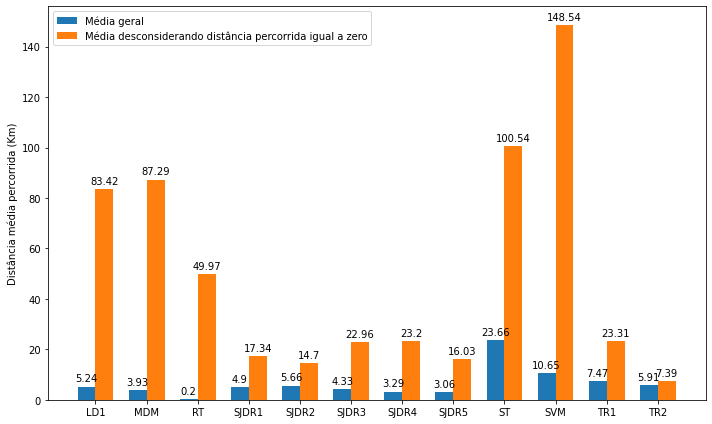

In [22]:
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))

ax.set_ylabel('Distância média percorrida (Km)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects1 = ax.bar(x - width/2, lower_mean, width, label='Média geral')
rects2 = ax.bar(x + width/2, higher_mean, width, label='Média desconsiderando distância percorrida igual a zero')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.legend()
plt.savefig('/home/gustavo/Desktop/Mestrado/mestrado_dados/Mean_of_travelled_distance_by_location.png')
plt.show()

No handles with labels found to put in legend.


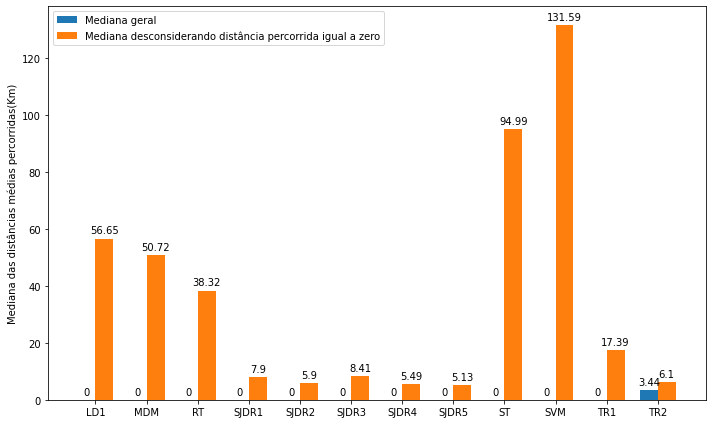

In [23]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_ylabel('Mediana das distâncias médias percorridas(Km)')
#ax.set_title('Median of travelled distance by location')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects1 = ax.bar(x - width/2, lower_median, width, label='Mediana geral')
rects2 = ax.bar(x + width/2, higher_median, width, label='Mediana desconsiderando distância percorrida igual a zero')

#autolabel(rects1)
#autolabel(rects2)
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.legend()
plt.savefig('/home/gustavo/Desktop/Mestrado/mestrado_dados/Median_of_travelled_distance_by_location.png')
plt.show()

No handles with labels found to put in legend.


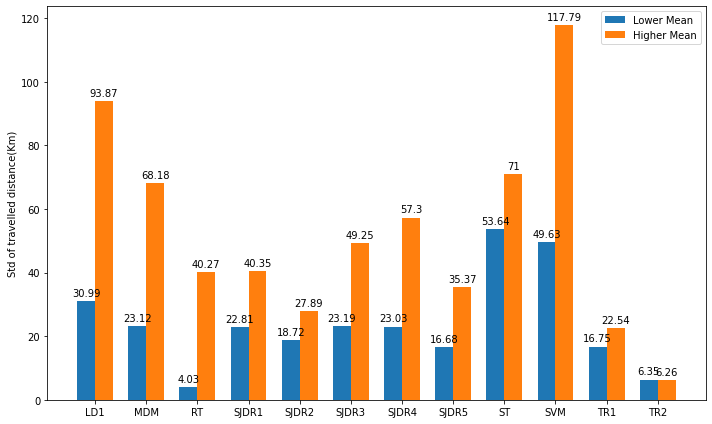

In [24]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_ylabel('Std of travelled distance(Km)')
#ax.set_title('Std of travelled Distance by location')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects1 = ax.bar(x - width/2, lower_std, width, label='Lower Mean')
rects2 = ax.bar(x + width/2, higher_std, width, label='Higher Mean')

#autolabel(rects1)
#autolabel(rects2)
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.legend()
plt.savefig('/home/gustavo/Desktop/Mestrado/mestrado_dados/Std_of_travelled_distance_by_location.png')
plt.show()

# Distribuição da série de distância percorrida por região

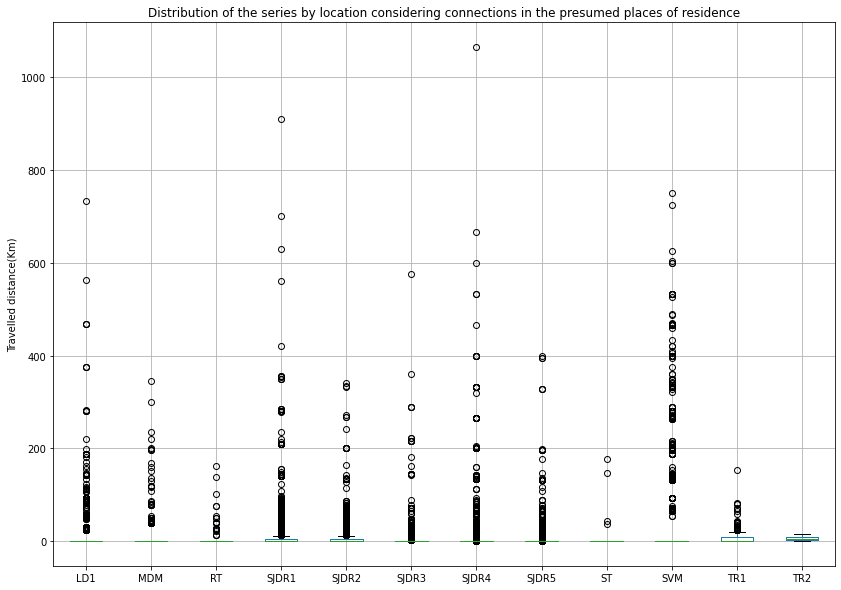

In [25]:
#Considerando os ligações no local de residência presumida
fig, ax = plt.subplots(figsize=(14,10))

ax.set_ylabel('Travelled distance(Km)')
ax.set_title('Distribution of the series by location considering connections in the presumed places of residence')

df_sd = df_final[['PRESUMED_RESIDENCE', 'TRAVELLED_DISTANCE']]
pivoted = df_sd.pivot(columns='PRESUMED_RESIDENCE')
pivoted = pivoted.TRAVELLED_DISTANCE
pivoted.boxplot(figsize=(20,12))
plt.savefig('/home/gustavo/Desktop/Mestrado/mestrado_dados/series_distribution_with_0.png')
plt.show()

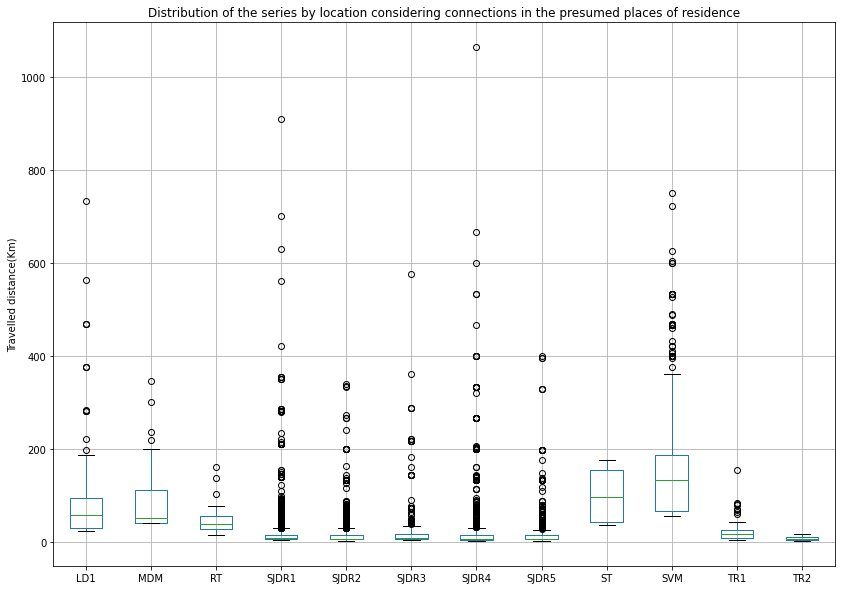

In [26]:
#Considerando os ligações no local de residência presumida
fig, ax = plt.subplots(figsize=(14,10))

ax.set_ylabel('Travelled distance(Km)')
ax.set_title('Distribution of the series by location considering connections in the presumed places of residence')

df_sd = df_without_0[['PRESUMED_RESIDENCE', 'TRAVELLED_DISTANCE']]
pivoted = df_sd.pivot(columns='PRESUMED_RESIDENCE')
pivoted = pivoted.TRAVELLED_DISTANCE
pivoted.boxplot(figsize=(20,12))
plt.savefig('/home/gustavo/Desktop/Mestrado/mestrado_dados/series_distribution_without_0.png')
plt.show()

In [27]:
result_by_class = result.groupby('CLASS').mean().reset_index()


In [28]:
result_by_class['CLASS'][2] = 'GERAL'
result_by_class

/home/gustavo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CLASS,LOWER_MEAN,HIGHER_MEAN,LOWER_MEDIAN,HIGHER_MEDIAN,LOWER_STD,HIGHER_STD
0,2,8.736351,93.953491,0.000000,74.454360,32.281460,78.221231
1,3,4.944462,17.847131,0.491371,8.043943,18.218353,34.138414
2,GERAL,6.525000,49.557500,0.286667,35.715833,24.078333,52.505833


In [29]:
labels = result_by_class.CLASS.values

lower_mean = np.round(result_by_class.LOWER_MEAN.values, 2)
higher_mean = np.round(result_by_class.HIGHER_MEAN.values,2)

lower_median = np.round(result_by_class.LOWER_MEDIAN.values, 2)
higher_median = np.round(result_by_class.HIGHER_MEDIAN.values,2)

lower_std = np.round(result_by_class.LOWER_STD.values, 2)
higher_std = np.round(result_by_class.HIGHER_STD.values,2)

No handles with labels found to put in legend.


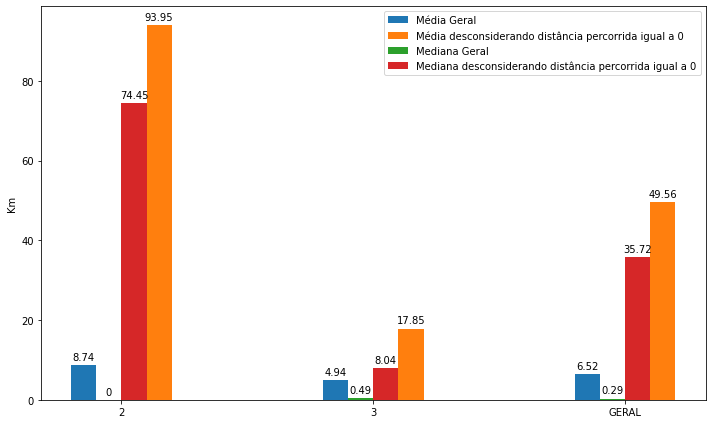

In [36]:
x = np.arange(len(labels))
width = 0.1

fig, ax = plt.subplots(figsize=(10,6))

ax.set_ylabel('Km')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects1 = ax.bar(x - width * 1.5, lower_mean, width, label='Média Geral')
rects2 = ax.bar(x + width * 1.5, higher_mean, width, label='Média desconsiderando distância percorrida igual a 0')
rects3 = ax.bar(x - width/2, lower_median, width, label='Mediana Geral')
rects4 = ax.bar(x + width/2, higher_median, width, label='Mediana desconsiderando distância percorrida igual a 0')
#rects5 = ax.bar(x - width * 2.5, lower_std, width, label='Lower Std')
#rects6 = ax.bar(x + width * 2.5, higher_std, width, label='Higher Std')

#autolabel(rects1)
#autolabel(rects2)
ax.bar_label(rects1, padding=3)
ax.bar_label(rects4, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects2, padding=3)
#ax.bar_label(rects5, padding=3)
#ax.bar_label(rects6, padding=3)

fig.tight_layout()
plt.legend()
plt.savefig('/home/gustavo/Desktop/Mestrado/mestrado_dados/Mean_Median_By_Class.png')
plt.show()

In [41]:
width/2

0.05